# **Data Preparation**

Data Preparation merupakan langkah lanjut dari data understanding, mempersiapkan data mencakup semua aktifitas untuk membangun dataset akhir (data yang siap untuk dijadikan input bagi model data mining)


Tugasnya adalah memilih table, record dan atribut juga tranformasi dan membersihkan data



## **Langkah-langkah Prepocessing Data**

### **Instalasi Library PIP untuk Database**

In [ ]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.5 MB/s eta 0:00:00


### **Penggabungan Database**

Koneksikan kedua database dengan informasi dari aiven. Gabung feature sepal length, sepal width, petal_length, dan petal_width dengan menggunakan fungsi merge dari pandas

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.legend_handler import HandlerPathCollection
from scipy.spatial.distance import euclidean

def get_pg_data():
    conn = psycopg2.connect(
        host="pg-359aec68-tugas-pendata.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_oal2yP3mG6JLIwX3BUK",
        database="defaultdb",
        port=17416
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_data")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-3634ef1a-tugas-pendata.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_2NRSFWfr9pGMEI7BSpA",
        database="defaultdb",
        port=17416
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_data")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

feature_columns = ["petal length", "petal width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))



 id           class  petal length  petal width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          78.0         88.0          90.0         80.0
  3     Iris-setosa           1.6          0.4           6.3          2.8
  4     Iris-setosa           1.5          0.2           4.7          3.2
  5     Iris-setosa           1.4          0.2           5.1          3.6
  6     Iris-setosa           1.7          0.4           5.1          3.4
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa          99.0         87.0          77.0         98.0
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4     

### **Deteksi Outlier**

Deteksi Outlier mengggunakan Local Outlier Factor (LOF).

Algoritma LOF bekerja dengan membandingkan kepadatan lokal titik data dengan kepadatan tetangganya. `n_neighbors=7` berarti setiap titik akan dibandingkan dengan 7 tetangga terdekatnya. Outlier memiliki kepadatan yang lebih rendah dibandingkan tetangganya.


*   Menandai outlier dalam dataset (-1 untuk outlier, 1 untuk data normal).
*   Menghitung dan menampilkan jumlah outlier.
*   Menampilkan tabel dengan ID, kelas, dan status outlier dalam format HTML.



In [81]:
from IPython.display import display, HTML
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Menerapkan Local Outlier Factor untuk deteksi outlier
X = df_merged.iloc[:, 2:].values  # Mengambil fitur numerik
clf = LocalOutlierFactor(n_neighbors=20,contamination=0.1)
y_pred = clf.fit_predict(X)
df_merged['outlier'] = np.where(y_pred == -1, -1, 1)  # Menandai outlier (-1) dan non-outlier (1)
X_scores = clf.negative_outlier_factor_

# Menampilkan tabel ID dan status outlier tanpa indeks
outlier_table = df_merged[['id', 'class', 'outlier']]
print("\nTabel ID dan Status Outlier:")

# Menampilkan jumlah outlier
total_outliers = (y_pred == -1).sum()
print(f"Jumlah outlier yang terdeteksi: {total_outliers}")

# Menampilkan tabel tanpa indeks
display(HTML(outlier_table.to_html(index=False)))



Tabel ID dan Status Outlier:
Jumlah outlier yang terdeteksi: 15


id,class,outlier
1,Iris-setosa,1
2,Iris-setosa,-1
3,Iris-setosa,1
4,Iris-setosa,1
5,Iris-setosa,1
6,Iris-setosa,1
7,Iris-setosa,1
8,Iris-setosa,1
9,Iris-setosa,1
10,Iris-setosa,-1


### **Pengelompokan Data Outlier**



In [82]:
from IPython.display import display, HTML
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Menerapkan Local Outlier Factor untuk deteksi outlier
X = df_merged.iloc[:, 2:].values  # Mengambil fitur numerik
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
df_merged['outlier'] = np.where(y_pred == -1, -1, 1)  # Menandai outlier (-1) dan non-outlier (1)
X_scores = clf.negative_outlier_factor_

# Filter untuk menampilkan hanya data outlier
outlier_table = df_merged.loc[df_merged['outlier'] == -1, ['id', 'class', 'outlier']]
print("\nTabel ID dan Status Outlier (Hanya Outlier):")

# Menampilkan jumlah outlier yang terdeteksi
total_outliers = (y_pred == -1).sum()
print(f"Jumlah outlier yang terdeteksi: {total_outliers}")

# Menampilkan tabel tanpa indeks
display(HTML(outlier_table.to_html(index=False)))



Tabel ID dan Status Outlier (Hanya Outlier):
Jumlah outlier yang terdeteksi: 15


id,class,outlier
2,Iris-setosa,-1
10,Iris-setosa,-1
16,Iris-setosa,-1
21,Iris-setosa,-1
23,Iris-setosa,-1
50,Iris-setosa,-1
58,Iris-versicolor,-1
63,Iris-versicolor,-1
94,Iris-versicolor,-1
99,Iris-versicolor,-1


### **Pengahapusan Data dari Outlier**

Hapus semua data outlier dan menampilkan semua data dan total setelah penghapusan

In [84]:
from sklearn.neighbors import LocalOutlierFactor


# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal length", "petal width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(data_values)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Menampilkan jumlah data sebelum dan setelah pembersihan
print(f"Jumlah data sebelum pembersihan: {df_merged.shape[0]}")
print(f"Jumlah data setelah pembersihan: {df_cleaned.shape[0]}")

# Menampilkan data yang telah dibersihkan
print(df_cleaned.to_string(index=False))


Jumlah data sebelum pembersihan: 151
Jumlah data setelah pembersihan: 136
 id           class  petal length  petal width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  3     Iris-setosa           1.6          0.4           6.3          2.8
  4     Iris-setosa           1.5          0.2           4.7          3.2
  5     Iris-setosa           1.4          0.2           5.1          3.6
  6     Iris-setosa           1.7          0.4           5.1          3.4
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa           1.6          0.2           4.8          3.4
 13     Iris-setosa           1.4          0.1           4.8          3.0
 14     Iris-setosa           1.1     

### Visualisasi Persebaran Class

#### Visualisasi Petal

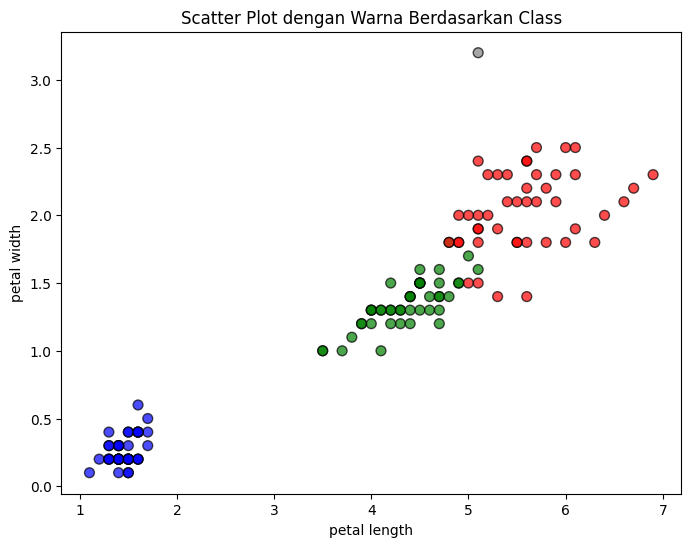

In [87]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "petal length"
y_feature = "petal width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
# Handle missing values by filling with 'grey'
df_cleaned["color"] = df_cleaned["class"].map(colors).fillna('grey')

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

#### Visualisasi Sepal

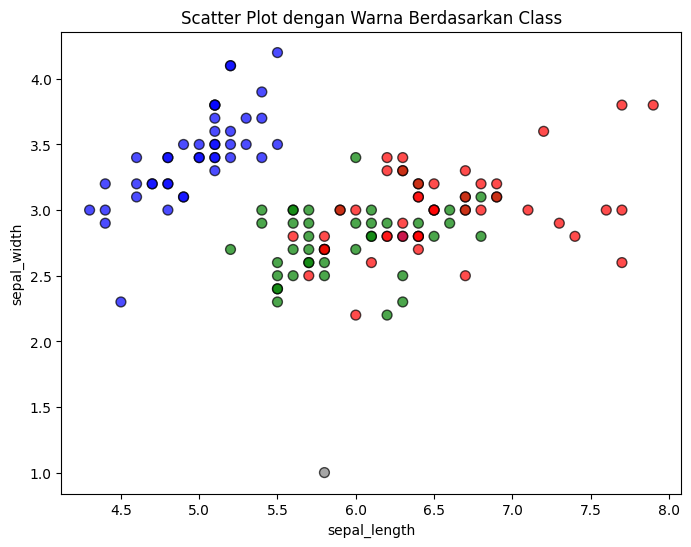

In [107]:
import matplotlib.pyplot as plt

# Pilih dua fitur untuk scatter plot
x_feature = "sepal_length"
y_feature = "sepal_width"

# Warna berdasarkan kelas
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}
# Handle missing values by filling with 'grey'
df_cleaned["color"] = df_cleaned["class"].map(colors).fillna('grey')

# Plot scatter dengan ukuran (s) dan warna (c)
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned[x_feature], df_cleaned[y_feature], s=50, c=df_cleaned["color"], alpha=0.7, edgecolors="k")
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title("Scatter Plot dengan Warna Berdasarkan Class")
plt.show()

### Pembagian Data

Bagi data untuk training set sebesar 80% dan data untuk testing 20%

In [89]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split


# Ambil data fitur numerik
feature_columns = ["petal length", "petal width", "sepal_length", "sepal_width"]
X = df_merged[feature_columns].values  # Data fitur
y = df_merged["class"]  # Label klasifikasi

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Menghapus data yang terdeteksi sebagai outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Bagi data menjadi Training (80%) dan Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[feature_columns], df_cleaned["class"], test_size=0.2, random_state=42
)

# Menampilkan jumlah data setelah pembagian
print(f"Jumlah data setelah pembersihan: {df_cleaned.shape[0]}")
print(f"Training set: {X_train.shape[0]} sampel")
print(f"Testing set: {X_test.shape[0]} sampel")


Jumlah data setelah pembersihan: 136
Training set: 108 sampel
Testing set: 28 sampel


### **Akurasi Data Tanpa Outlier**

In [120]:
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Ambil data fitur numerik
feature_columns = ["petal length", "petal width", "sepal_length", "sepal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)

# Menghapus data yang terdeteksi sebagai outlier
X_cleaned = X[outlier_labels == 1]
y_cleaned = y_encoded[outlier_labels == 1]

# Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42
)

# Pipeline dengan StandardScaler dan KNN
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model
clf.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = clf.predict(X_test)

# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model (Dengan Penghapusan Outlier): {accuracy:.2f}")

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
# Get unique class labels from y_test
unique_classes_test = np.unique(y_test)
# Get target names for the unique classes in the test set
target_names_test = label_encoder.inverse_transform(unique_classes_test)
print(classification_report(y_test, y_pred, target_names=target_names_test)) # Use target_names_test here

Akurasi Model (Dengan Penghapusan Outlier): 0.86

Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.70      0.78        10
 Iris-virginica       0.62      0.83      0.71         6

       accuracy                           0.86        28
      macro avg       0.83      0.84      0.83        28
   weighted avg       0.88      0.86      0.86        28



### **Akurasi Dengan Outlier**

In [122]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Ambil data fitur numerik
feature_columns = ["petal length", "petal width", "sepal_length", "sepal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data menjadi training (80%) dan testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Pipeline dengan StandardScaler dan KNN
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model
clf.fit(X_train, y_train)

# Prediksi pada data testing
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model (Tanpa Menghapus Outlier): {accuracy:.2f}")

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi:")
# Get unique class labels from y_test
unique_classes_test = np.unique(y_test)
# Get target names for the unique classes in the test set
target_names_test = label_encoder.inverse_transform(unique_classes_test)
print(classification_report(y_test, y_pred, target_names=target_names_test))

Akurasi Model (Tanpa Menghapus Outlier): 0.87

Laporan Klasifikasi:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.82      0.90        11
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.73      0.89      0.80         9

       accuracy                           0.87        31
      macro avg       0.88      0.87      0.87        31
   weighted avg       0.89      0.87      0.87        31



### **Perbandingan Kedua Akurasi**

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Ambil data fitur numerik
feature_columns = ["petal length", "petal width", "sepal_length", "sepal_width"]
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_labels = lof.fit_predict(X)

# Menghapus data yang terdeteksi sebagai outlier
X_cleaned = X[outlier_labels == 1]
y_cleaned = y_encoded[outlier_labels == 1]

# Split data menjadi training (80%) dan testing (20%) - Tanpa Penghapusan Outlier
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Split data menjadi training (80%) dan testing (20%) - Dengan Penghapusan Outlier
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42
)

# Pipeline dengan StandardScaler dan KNN (Tanpa Penghapusan Outlier)
clf_full = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])
clf_full.fit(X_train_full, y_train_full)
y_pred_full = clf_full.predict(X_test_full)
accuracy_full = accuracy_score(y_test_full, y_pred_full)

# Pipeline dengan StandardScaler dan KNN (Dengan Penghapusan Outlier)
clf_cleaned = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])
clf_cleaned.fit(X_train_cleaned, y_train_cleaned)
y_pred_cleaned = clf_cleaned.predict(X_test_cleaned)
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)

# Tampilkan hasil perbandingan
print(f"Akurasi Model (Tanpa Penghapusan Outlier): {accuracy_full:.2f}")
print(f"Akurasi Model (Dengan Penghapusan Outlier): {accuracy_cleaned:.2f}")

# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi (Tanpa Penghapusan Outlier):")
target_names_full = label_encoder.inverse_transform(np.unique(y_test_full))
print(classification_report(y_test_full, y_pred_full, target_names=target_names_full))

print("\nLaporan Klasifikasi (Dengan Penghapusan Outlier):")
target_names_cleaned = label_encoder.inverse_transform(np.unique(y_test_cleaned))
print(classification_report(y_test_cleaned, y_pred_cleaned, target_names=target_names_cleaned))


Akurasi Model (Tanpa Penghapusan Outlier): 0.87
Akurasi Model (Dengan Penghapusan Outlier): 0.86

Laporan Klasifikasi (Tanpa Penghapusan Outlier):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.82      0.90        11
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.73      0.89      0.80         9

       accuracy                           0.87        31
      macro avg       0.88      0.87      0.87        31
   weighted avg       0.89      0.87      0.87        31


Laporan Klasifikasi (Dengan Penghapusan Outlier):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.70      0.78        10
 Iris-virginica       0.62      0.83      0.71         6

       accuracy                           0.86        28
      macro avg       0.83      0.84      0.83        28
   weighted avg       0.88      0.86      0.86        28